# Ted Talks Analysis

**First, I import the packages I need:**

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

### Import the data in DF

In [2]:
ted_data = pd.read_csv('data.csv')
print(ted_data.head())

                                               title                author  \
0      Climate action needs new frontline leadership  Ozawa Bineshi Albert   
1        The dark history of the overthrow of Hawaii         Sydney Iaukea   
2     How play can spark new ideas for your business         Martin Reeves   
3  Why is China appointing judges to combat clima...     James K. Thornton   
4     Cement's carbon problem — and 2 ways to fix it       Mahendra Singhi   

             date   views  likes  \
0   December 2021  404000  12000   
1   February 2022  214000   6400   
2  September 2021  412000  12000   
3    October 2021  427000  12000   
4    October 2021    2400     72   

                                                link  
0  https://ted.com/talks/ozawa_bineshi_albert_cli...  
1  https://ted.com/talks/sydney_iaukea_the_dark_h...  
2  https://ted.com/talks/martin_reeves_how_play_c...  
3  https://ted.com/talks/james_k_thornton_why_is_...  
4  https://ted.com/talks/mahendra_singh

### I inspect the DF

In [3]:
print(ted_data.shape)
print(ted_data.dtypes)

(5440, 6)
title     object
author    object
date      object
views      int64
likes      int64
link      object
dtype: object


I immediatly note that the date column is not in date format. In any case, I could separate the year in a specific column, in order to compare 2021 vs 2022 (or any other year).

### I separate month and year in two new columns

In [4]:
ted_data['str_split'] = ted_data.date.str.split(' ')
ted_data['month'] = ted_data.str_split.str.get(0)
ted_data['year'] = ted_data.str_split.str.get(1)
ted_data.drop('str_split', axis=1, inplace=True)
print(ted_data.head())

                                               title                author  \
0      Climate action needs new frontline leadership  Ozawa Bineshi Albert   
1        The dark history of the overthrow of Hawaii         Sydney Iaukea   
2     How play can spark new ideas for your business         Martin Reeves   
3  Why is China appointing judges to combat clima...     James K. Thornton   
4     Cement's carbon problem — and 2 ways to fix it       Mahendra Singhi   

             date   views  likes  \
0   December 2021  404000  12000   
1   February 2022  214000   6400   
2  September 2021  412000  12000   
3    October 2021  427000  12000   
4    October 2021    2400     72   

                                                link      month  year  
0  https://ted.com/talks/ozawa_bineshi_albert_cli...   December  2021  
1  https://ted.com/talks/sydney_iaukea_the_dark_h...   February  2022  
2  https://ted.com/talks/martin_reeves_how_play_c...  September  2021  
3  https://ted.com/talks/j

## 1. How many videos are created each year?

In [5]:
ted_data_year = ted_data.groupby('year').title.count().reset_index()
print(ted_data_year)

    year  title
0   1970      2
1   1972      1
2   1983      1
3   1984      1
4   1990      1
5   1991      1
6   1994      1
7   1998      6
8   2001      5
9   2002     26
10  2003     34
11  2004     33
12  2005     65
13  2006     49
14  2007    113
15  2008     84
16  2009    233
17  2010    267
18  2011    271
19  2012    302
20  2013    388
21  2014    357
22  2015    377
23  2016    399
24  2017    495
25  2018    473
26  2019    544
27  2020    501
28  2021    390
29  2022     20


When I inspected the first rows of the DF, I never could imagine that there were many videos older than 2 years ago. First videos on TED Talks were created in 1970.
Interesting thing is that until 2010, the production of videos of TED Talks was not so high and in many years no videos were published.
This is a table, but how does it appear if I plot this data?

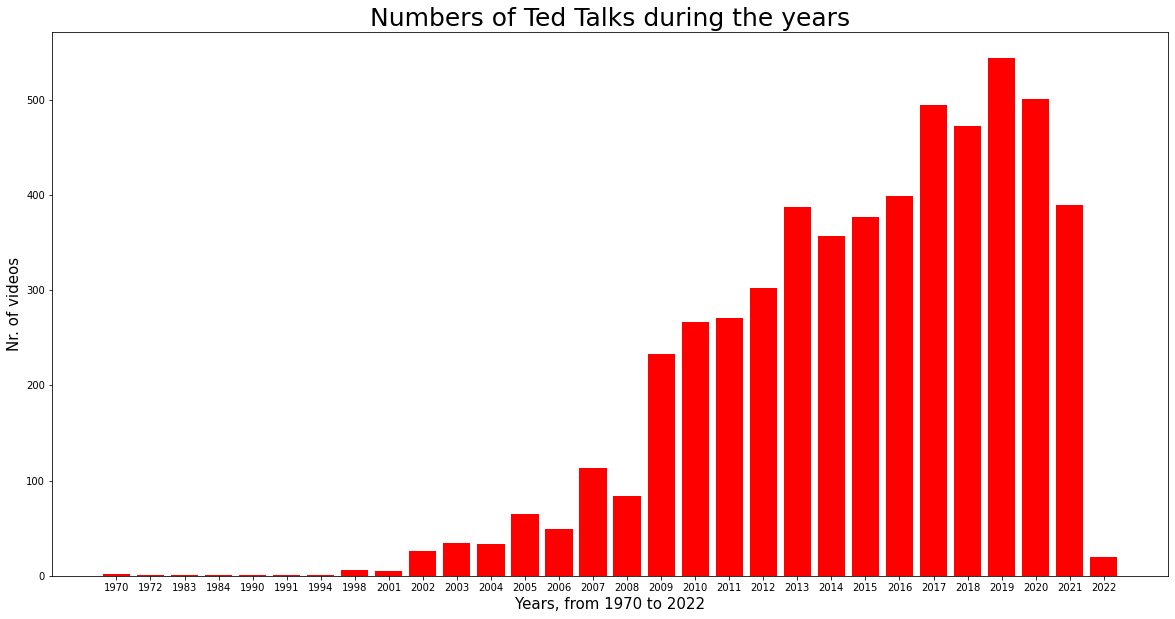

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize = (20, 10))
plt.bar(ted_data_year.year, ted_data_year.title, color = 'red')
plt.title('Numbers of Ted Talks during the years', fontsize = 25)
plt.xlabel('Years, from 1970 to 2022', fontsize = 15)
plt.ylabel('Nr. of videos', fontsize = 15)
plt.show()

## 2. Like and views distributions

How are likes and views distributions? Normal distributions? Skewed (left or right)? Let's investigate...

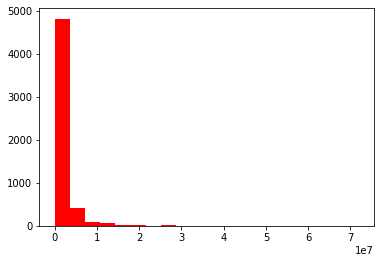

In [8]:
plt.hist(ted_data.views, bins = 20, color = 'red')
plt.show()

I immediatly note that most videos have between 0 and 10.000.000 views, but this histogram is not clear, because there are many outliers. So, I create an histogram only taking the more popular portion of dataset.

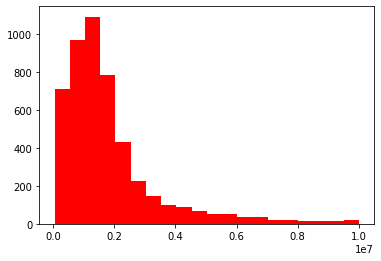

In [9]:
plt.hist(ted_data.views, bins = 20, range = (50000, 10000000), color = 'red')
plt.show()

I've analyzed only videos from 50k to 5 million views. In any case, the distribution is skew-right and is not unimodal, because we can see 3 peaks.

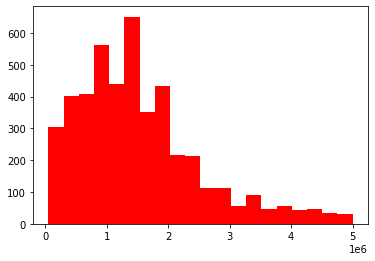

In [10]:
plt.hist(ted_data.views, bins = 20, range = (50000, 5000000), color = 'red')
plt.show()

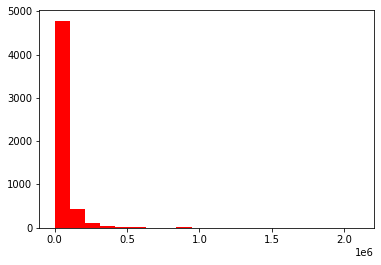

In [11]:
plt.hist(ted_data.likes, bins = 20, color = 'red')
plt.show()

I notice that we have the same "problem" with likes. Most videos have between 0 and 500.000 likes, but this histogram is not clear, because there are many outliers. So, I create an histogram only taking the more popular portion of dataset.

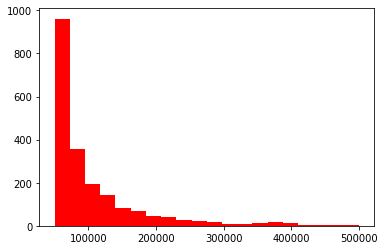

In [12]:
plt.hist(ted_data.likes, bins = 20, range = (50000, 500000), color = 'red')
plt.show()

I've analyzed only videos from 0 to 500k likes. In any case, the distribution is skew-right but is unimodal. In fact, most videos have up to 50.000 likes and are in the first bin of the histogram.

I can invest if there is a relationship between the number of views and number of likes of a TED Talks videos. Is there?

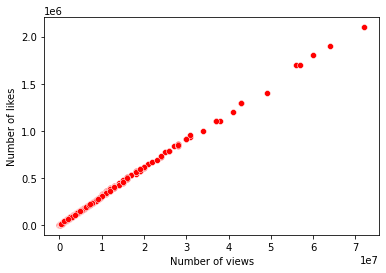

In [13]:
import seaborn as sns
sns.scatterplot(data = ted_data, x = 'views', y = 'likes', color = 'red')
plt.xlabel('Number of views')
plt.ylabel('Number of likes')
plt.show()

It's clear that YES, there is a linear relationship between the two variables. Most views, most likes.
It could be confirmed with covariance calculations:

In [14]:
cov_views_likes = np.cov(ted_data.views, ted_data.likes)
print(cov_views_likes)

[[1.27241865e+13 3.83856396e+11]
 [3.83856396e+11 1.15878270e+10]]


In [15]:
from scipy.stats import pearsonr
corr_views_likes, p = pearsonr(ted_data.views, ted_data.likes)
print(corr_views_likes)

0.9996610444062042


As we can see in both calculations, there is a STRONG linear relationship between the two variables, as already viewed in the scatterplot.

## 3. Which is the most popular video?

In [16]:
best_video_views = ted_data.views.max()

best_video_title = ted_data[ted_data.views == ted_data.views.max()].reset_index()

print('The video with most views has ', best_video_views, ' views and it is: ')
print(best_video_title)

The video with most views has  72000000  views and it is: 
   index                        title            author           date  \
0   5436  Do schools kill creativity?  Sir Ken Robinson  February 2006   

      views    likes                                               link  \
0  72000000  2100000  https://ted.com/talks/sir_ken_robinson_do_scho...   

      month  year  
0  February  2006  


How many views has the most viewed video each year?

In [17]:
best_video_per_year = ted_data.groupby('year').views.max().reset_index()
print(best_video_per_year)

    year     views
0   1970    192000
1   1972   1300000
2   1983    690000
3   1984   1100000
4   1990    723000
5   1991    327000
6   1994    699000
7   1998   3800000
8   2001   7000000
9   2002   6400000
10  2003   7100000
11  2004  19000000
12  2005  16000000
13  2006  72000000
14  2007  16000000
15  2008  28000000
16  2009  57000000
17  2010  56000000
18  2011  31000000
19  2012  64000000
20  2013  49000000
21  2014  22000000
22  2015  43000000
23  2016  60000000
24  2017  28000000
25  2018  14000000
26  2019  15000000
27  2020   8600000
28  2021  10000000
29  2022   2300000


But... which videos are these? I use SQL in Python to investigate...

In [18]:
import sqldf
query = """
SELECT title, author, year, MAX(views) FROM ted_data
GROUP BY year
ORDER BY MAX(views) desc;
"""
df_view = sqldf.run(query)
print(df_view)

                                                title               author  \
0                         Do schools kill creativity?     Sir Ken Robinson   
1            Your body language may shape who you are            Amy Cuddy   
2          Inside the mind of a master procrastinator            Tim Urban   
3                    How great leaders inspire action          Simon Sinek   
4                          The power of vulnerability          Brené Brown   
5          How to speak so that people want to listen      Julian Treasure   
6                  The next outbreak? We're not ready           Bill Gates   
7                                  How to spot a liar         Pamela Meyer   
8              The future we're building — and boring            Elon Musk   
9                                My stroke of insight    Jill Bolte Taylor   
10                         The Infinite Hotel Paradox        Jeff Dekofsky   
11                The surprising science of happiness          D

And, what about the most liked videos for each year? Let's see...

In [19]:
query = """
SELECT title, author, year, MAX(likes) FROM ted_data
GROUP BY year
ORDER BY MAX(views) desc;
"""
df_like = sqldf.run(query)
print(df_like)

                                                title               author  \
0                         Do schools kill creativity?     Sir Ken Robinson   
1            Your body language may shape who you are            Amy Cuddy   
2          Inside the mind of a master procrastinator            Tim Urban   
3                    How great leaders inspire action          Simon Sinek   
4                          The power of vulnerability          Brené Brown   
5          How to speak so that people want to listen      Julian Treasure   
6                  The next outbreak? We're not ready           Bill Gates   
7                                  How to spot a liar         Pamela Meyer   
8              The future we're building — and boring            Elon Musk   
9                                My stroke of insight    Jill Bolte Taylor   
10                         The Infinite Hotel Paradox        Jeff Dekofsky   
11                The surprising science of happiness          D

### 4. What about the authors? How many authors created videos TED Talks? Are someone created more than 1 video?

In [20]:
authors = ted_data.groupby('author').title.count().reset_index()
authors = authors.sort_values(by=['title'], ascending=False)
print(authors)

                author  title
148       Alex Gendler     45
1781  Iseult Gillespie     33
2845       Matt Walker     18
152     Alex Rosenthal     15
1283     Elizabeth Cox     13
...                ...    ...
1582        Gill Hicks      1
1583      Gillian Gibb      1
1584      Gina Brillon      1
1585        Gina Cooke      1
4442       Özlem Cekic      1

[4443 rows x 2 columns]


We can see that there are only 4.443 authors that globally created 5.440 videos.
Many of them, created only few videos (up to 5) and few of them created more than 5 videos.
Let's investigate...

In [21]:
authors_1_5 = authors.loc[authors['title'] < 6]
print(authors_1_5)

                        author  title
3991            Steven Johnson      5
2457  Kristen Bell + Giant Ant      5
1423                Eve Ensler      5
3145       Nicholas Negroponte      5
3902          Sir Ken Robinson      5
...                        ...    ...
1582                Gill Hicks      1
1583              Gillian Gibb      1
1584              Gina Brillon      1
1585                Gina Cooke      1
4442               Özlem Cekic      1

[4416 rows x 2 columns]


That's the situations: 4.416 authors created at least 1 but no more than 5 videos.

In [22]:
authors_more_5 = authors.loc[authors['title'] > 5]
print(authors_more_5)

                    author  title
148           Alex Gendler     45
1781      Iseult Gillespie     33
2845           Matt Walker     18
152         Alex Rosenthal     15
1283         Elizabeth Cox     13
1338            Emma Bryce     12
962          Daniel Finkel     11
2216         Juan Enriquez     11
933             Dan Finkel      9
1655          Hans Rosling      9
4338      Wendy De La Rosa      9
1609             Greg Gage      9
3029          Mona Chalabi      9
1962            Jen Gunter      9
544             Bill Gates      8
2729         Marco Tempest      7
31                  TED-Ed      7
943           Dan Kwartler      7
1821  Jacqueline Novogratz      6
2213               Joy Lin      6
923             Dan Ariely      6
1433         Fabio Pacucci      6
3557                 Rives      6
3930   Soraya Field Fiorio      6
111                Al Gore      6
776         Chris Anderson      6
40             A.J. Jacobs      6


27 authors created more than 5 videos. We can notice that the most productive author is Alex Gendler that created 45 videos!